## For Colabs

In [1]:
from getpass import getpass
import os

user = "OliverJBoom"
password = getpass('github password')

os.environ['GITHUB_AUTH'] = user + ':' + password
os.chdir("/content")
!rm -rf "/content/acse-9-independent-research-project-OliverJBoom"
!git clone https://$GITHUB_AUTH@github.com/msc-acse/acse-9-independent-research-project-OliverJBoom.git
os.chdir("acse-9-independent-research-project-OliverJBoom/Forecaster")

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)
path = "/content/gdrive/My Drive/Chai/Data"

### Ensuring correct directory

In [15]:
import os
if "Foresight" in os.listdir():
    print("In correct directory")
elif "Foresight" in os.listdir("../"):
    print("Moving up a layer")
    os.chdir("../")
else:
    print("Have a deeper look at where the notebook is situated"
         "relative to the python files")

In correct directory


## Loading Packages

In [16]:
from Foresight import *
set_seed(42)

True

### Insuring that training is done on GPU if available

In [17]:
device = 'cpu'

if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
    
    if torch.cuda.device_count() > 1:
        print("Parallel Available")
        parallel=True
        
    else:
        parallel=False
        
else:
    print("No GPU available!")
    parallel=False

No GPU available!


## Loading Data

In [18]:
path = "Data/"
universe_dict = universe_select(path, "MTL")
use_lg_returns = False
auto_regressive = False
use_PCA = True
saving = False
loading = False

if auto_regressive: assert (auto_regressive!=use_PCA)

## Preprocessing

In [19]:
# Renaming the columns to price
universe_dict = price_rename(universe_dict)

# Cleaning the dataset of any erroneous datapoints
universe_dict = clean_dict_gen(universe_dict)

# Making sure that all the points in the window have consistent length
universe_dict = truncate_window_length(universe_dict)

# # Generating the dataset
if use_lg_returns:
    # Lg Returns Only
    df_full = generate_dataset(universe_dict, lg_only=True, price_only=False)
    target_col = ["cu_lme", "al_lme", "sn_lme", "pb_lme", "ni_lme"]
    
else:
    # Price Only
    df_full = generate_dataset(universe_dict, lg_only=False, price_only=True)
    target_col = ["price_cu_lme", "price_al_lme", "price_sn_lme", "price_pb_lme", "price_ni_lme"]

if auto_regressive:
    df_full = df_full[target_col]

Included Instrument:
al_shfe
al_lme
al_comex_p
Rows removed: 1
al_comex_s
al_lme_s
yuan
cu_shfe
cu_lme
cu_comex_p
cu_comex_s
peso
sol
bdi
ted
vix
skew
gsci
sn_lme
pb_lme
ni_lme


### Visualising the dataset

In [20]:
df_full.head(5)
# df_full.tail(5)

# Visualise the plots if desired
# visualise_df(df_full)

,price_al_shfe,price_al_lme,price_al_comex_p,price_al_comex_s,price_al_lme_s,price_yuan,price_cu_shfe,price_cu_lme,price_cu_comex_p,price_cu_comex_s,price_peso,price_sol,price_bdi,price_ted,price_vix,price_skew,price_gsci,price_sn_lme,price_pb_lme,price_ni_lme
date,,,,,,,,,,,,,,,,,,,,
2014-06-04,13270.0,1812.75,2189.75,13403.0,5170375.0,6.2494,49570.0,6834.0,3.0935,16395.0,552.09,2.789,959.0,0.0355,12.08,121.48,645.9893,23225.0,2103.0,19025.0
2014-06-05,13235.0,1824.25,2201.00,13852.0,5160575.0,6.2548,49520.0,6803.0,3.0910,16440.0,550.66,2.789,977.0,0.0355,11.68,122.21,646.6336,23245.0,2109.0,19030.0
2014-06-06,13280.0,1856.75,2222.25,14276.0,5152975.0,6.2498,49550.0,6696.0,3.0530,16323.0,549.03,2.789,989.0,0.0330,10.73,122.88,646.6281,23195.0,2109.0,18875.0
2014-06-09,13385.0,1886.00,2257.00,14876.0,5146525.0,6.2397,48720.0,6688.5,3.0455,16183.0,549.65,2.783,999.0,0.0355,11.15,124.67,651.2814,23295.0,2141.0,18905.0
2014-06-10,13455.0,1865.50,2250.75,15138.0,5140000.0,6.2240,48420.0,6710.0,3.0550,16320.0,553.49,2.789,1004.0,0.0406,10.99,125.38,648.0516,22865.0,2140.0,18775.0


### Normalizing the dataset

Number of dimensions: 7
Explained Variance Sum: 0.952
Explained Variance Composition [0.4731094  0.28411277 0.08974061 0.04456996 0.02808504 0.01800107
 0.01438797]
data_X  (1178, 132, 7) 
data_y (1178, 5)
Epoch: 0 Train: 14.08180 Val: 24.05098  Time: 3.337  Best Val: 24.05098


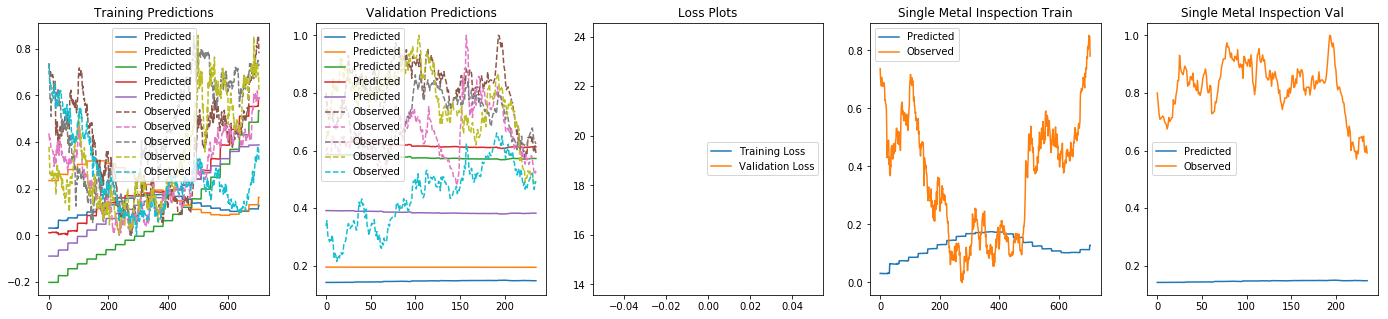

Epoch: 50 Train: 1.64225 Val: 9.33216  Time: 162.752  Best Val: 8.41100


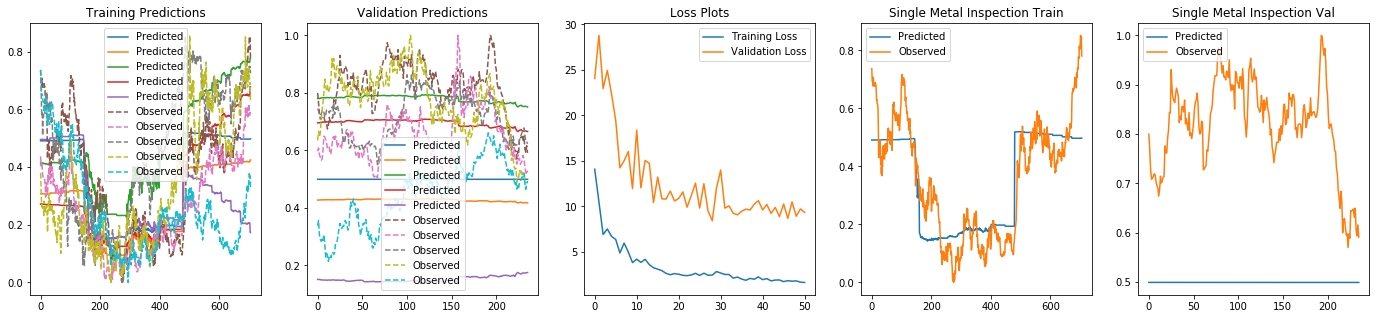

Epoch: 100 Train: 2.20668 Val: 13.22603  Time: 328.630  Best Val: 8.41100


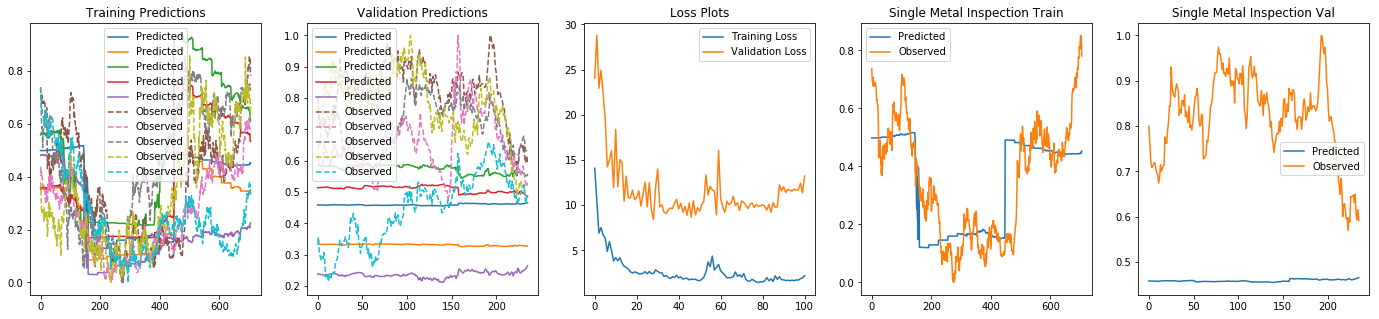

Early Stopping
MTL_AFalse_F5


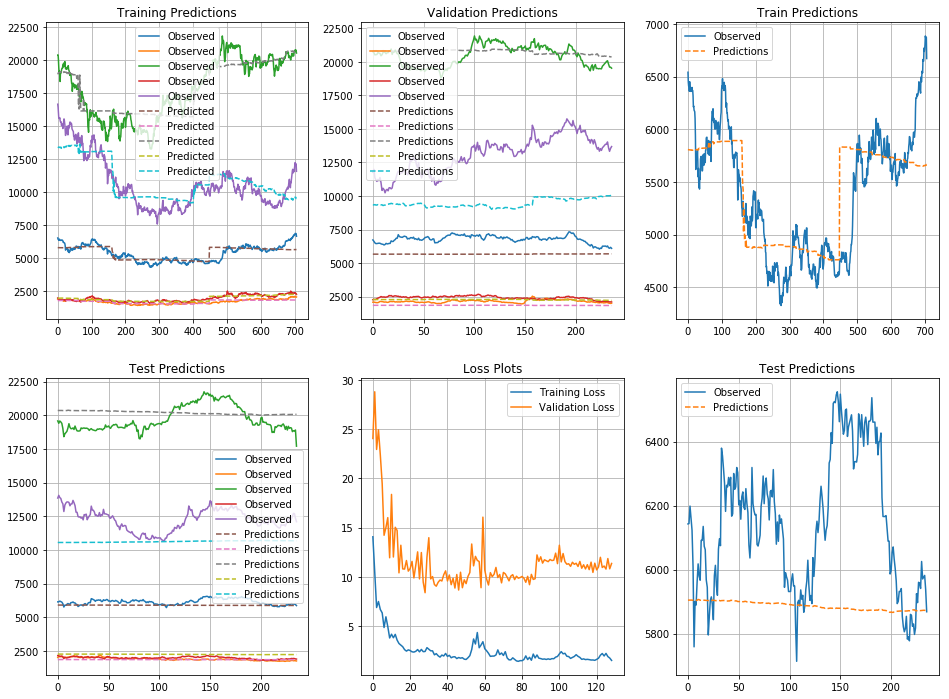

Copper Price Metrics:  110486.6311024521 267.68739538096776 0.49361702127659574
Complex Price Metrics:  931737.9413641688 648.8405082401708 0.4553191489361702
Naive:  57732.02 147.41885 0.45130434782608697


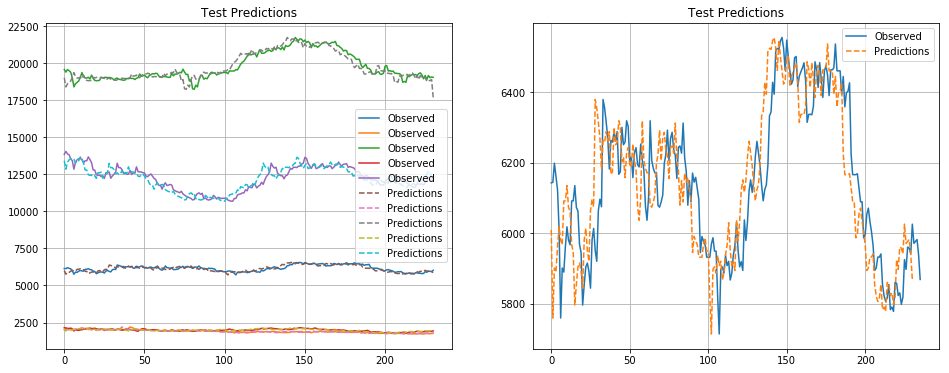

Number of dimensions: 7
Explained Variance Sum: 0.952
Explained Variance Composition [0.47823784 0.28403175 0.08399456 0.04503531 0.02831453 0.01764623
 0.01449351]
data_X  (1161, 132, 7) 
data_y (1161, 5)
Epoch: 0 Train: 9.88853 Val: 25.97990  Time: 4.282  Best Val: 25.97990


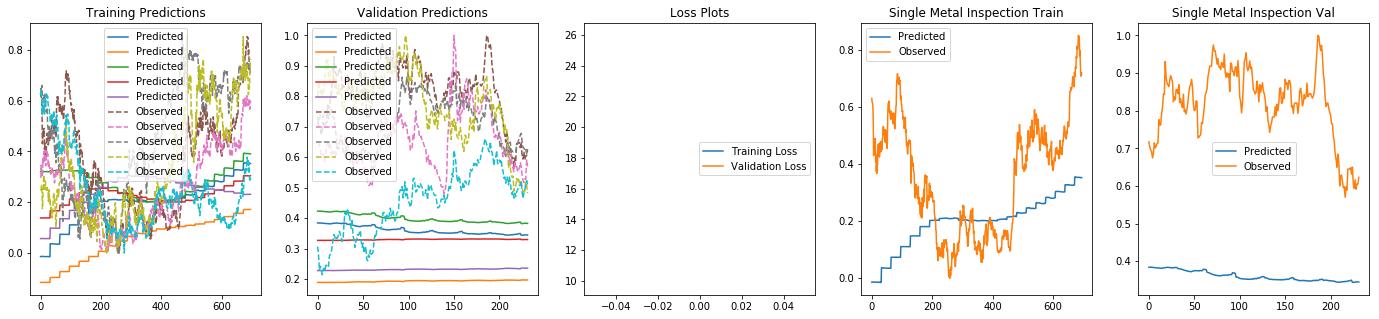

Epoch: 50 Train: 2.18068 Val: 26.42659  Time: 154.804  Best Val: 13.11027


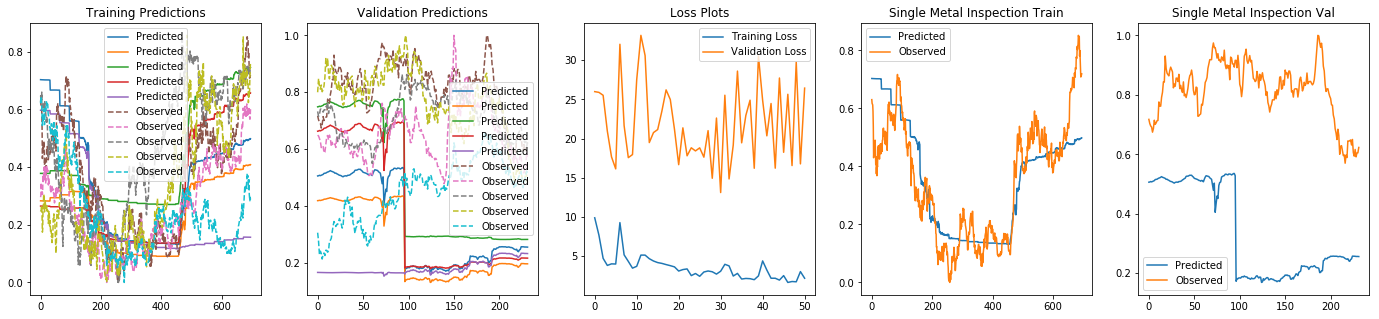

Epoch: 100 Train: 1.62664 Val: 5.07546  Time: 288.309  Best Val: 5.07546


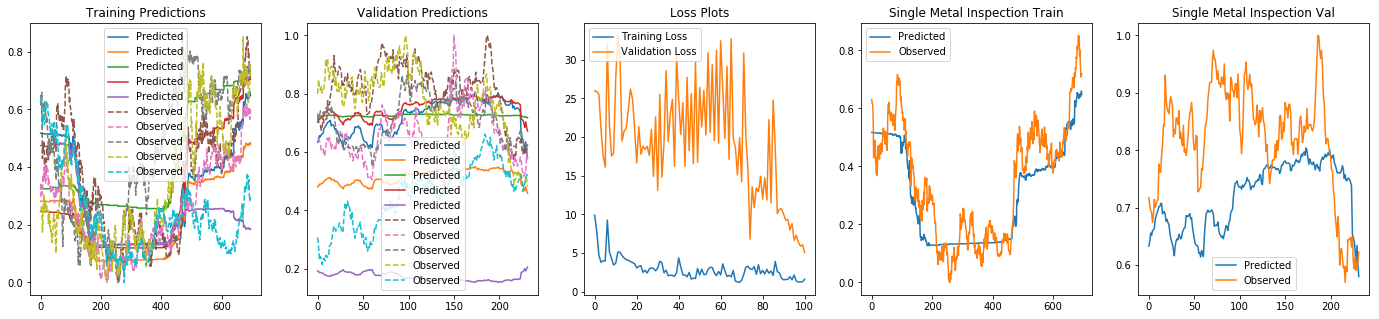

Epoch: 150 Train: 1.39474 Val: 3.04119  Time: 423.662  Best Val: 2.68843


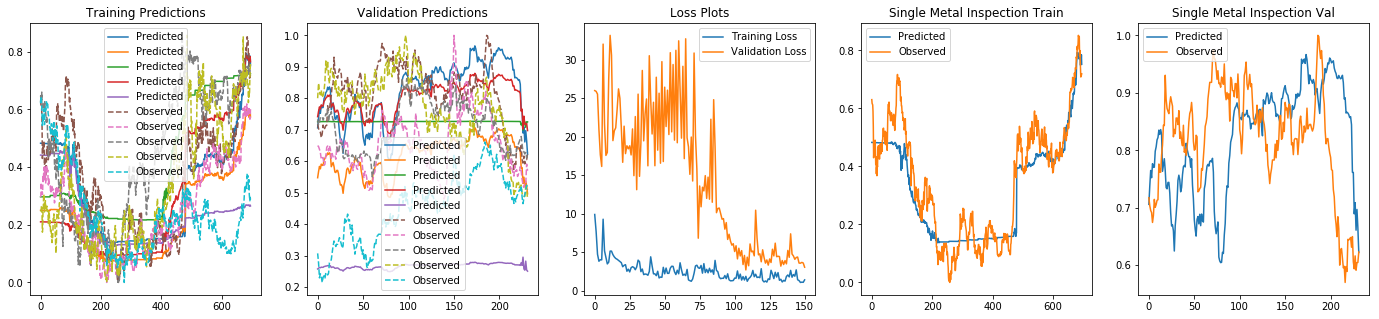

Epoch: 200 Train: 2.82507 Val: 6.95305  Time: 560.948  Best Val: 2.52038


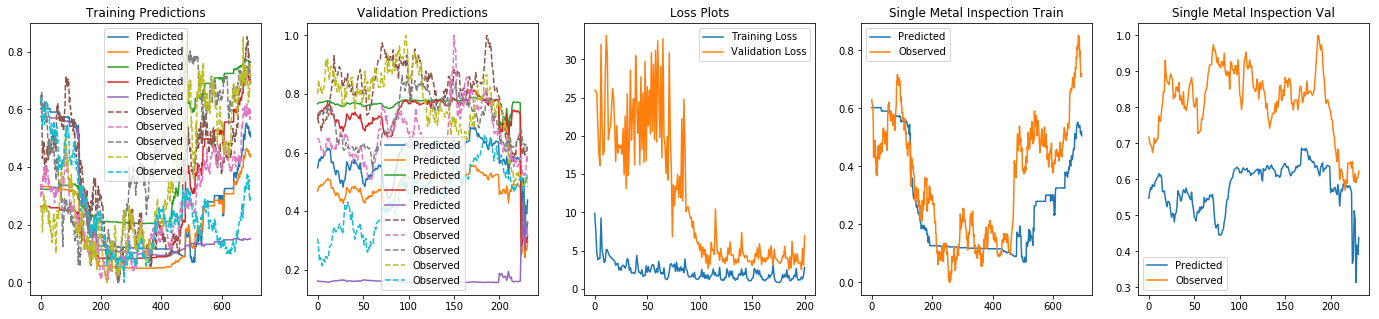

Epoch: 250 Train: 1.29399 Val: 2.96582  Time: 701.818  Best Val: 2.16478


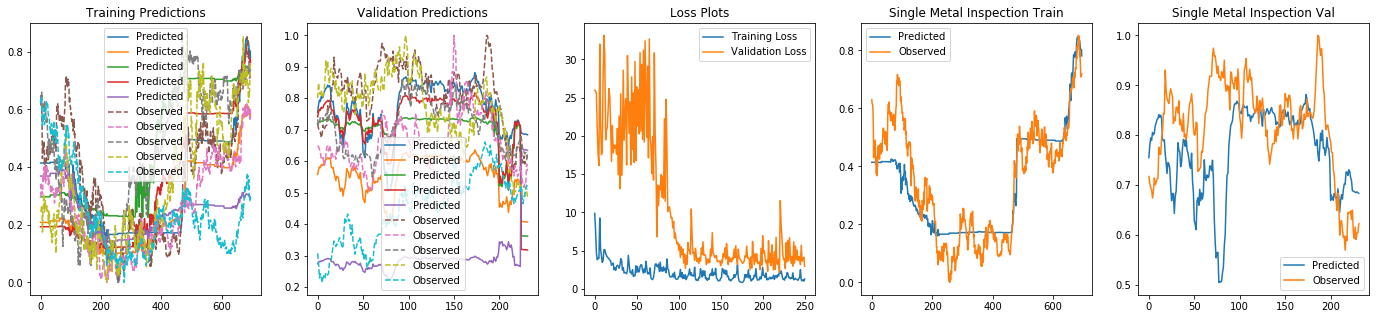

Epoch: 300 Train: 1.46382 Val: 7.41851  Time: 841.622  Best Val: 2.16478


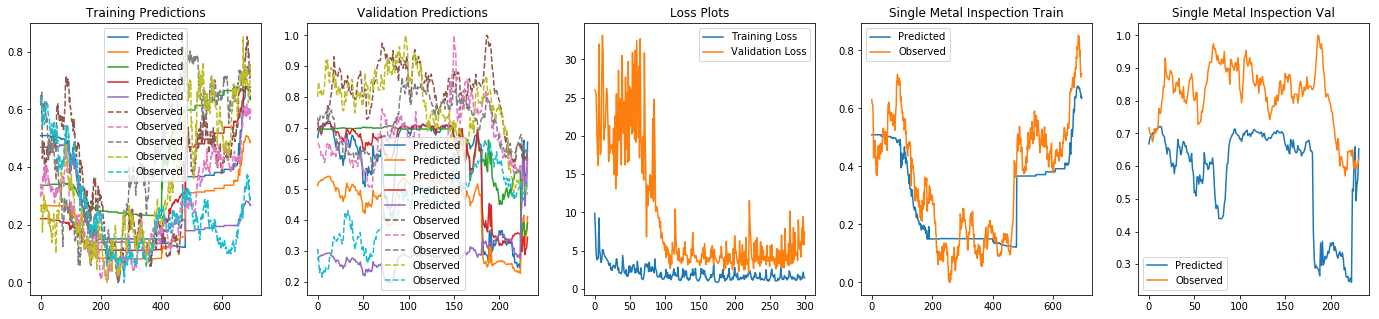

Early Stopping
MTL_AFalse_F22


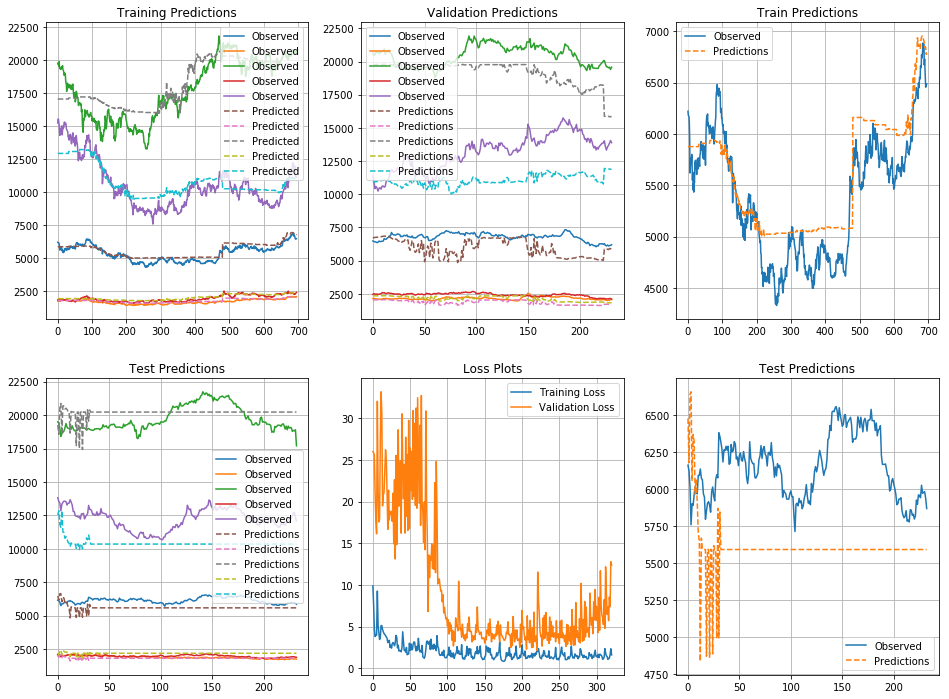

Copper Price Metrics:  373227.2905793807 561.3214589831911 0.07758620689655173
Complex Price Metrics:  1084386.4698669072 732.5767903343291 0.09827586206896552
Naive:  256191.1 308.42654 0.4438095238095238


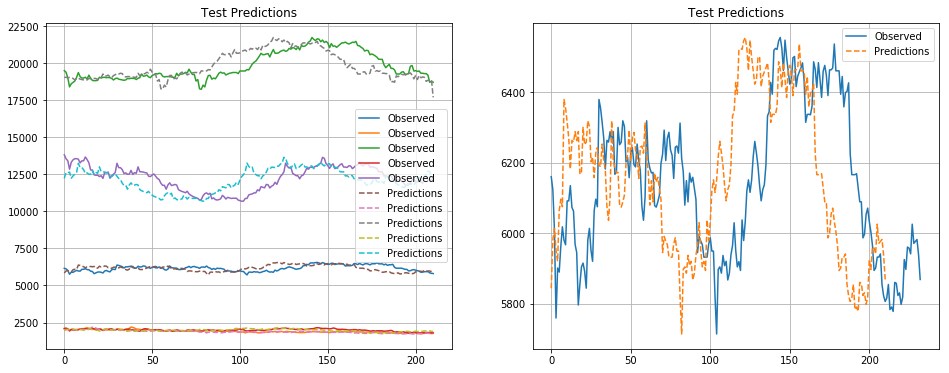

Number of dimensions: 7
Explained Variance Sum: 0.953
Explained Variance Composition [0.48939329 0.28786579 0.07016413 0.04546276 0.02790442 0.01754583
 0.01433423]
data_X  (1117, 132, 7) 
data_y (1117, 5)
Epoch: 0 Train: 9.85026 Val: 20.08431  Time: 2.331  Best Val: 20.08431


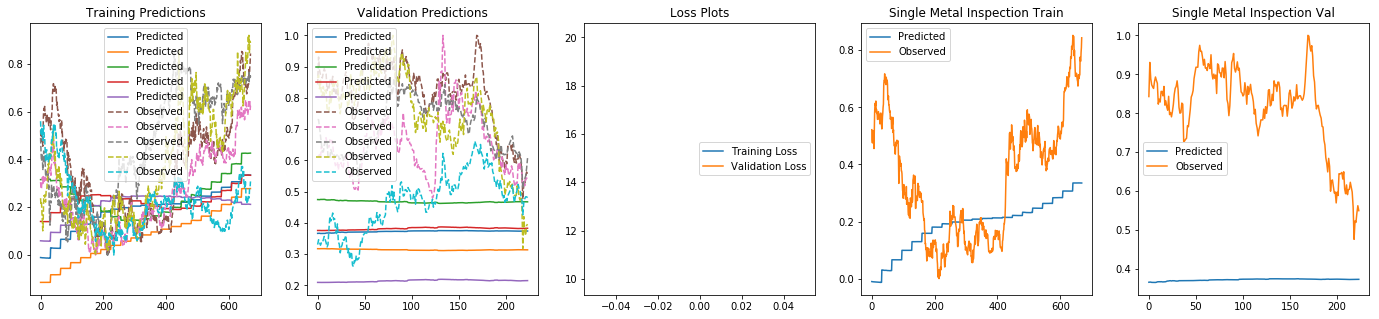

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/anaconda3/lib/python3

KeyboardInterrupt: 

In [31]:
for forecast_length in [5, 22, 66, 132]:

    # Data scaling
    scaler_data_X = MinMaxScaler()
    scaler_data_y = MinMaxScaler()

    df_target = df_full[target_col]

    data_X = scaler_data_X.fit_transform(df_full)[:-forecast_length, :]
    # Need to have an independent scaler for inverse_transforming later
    data_y = scaler_data_y.fit_transform(df_target)

    # Offset target one forecast length
    data_y = data_y[forecast_length:, :]

    # Reducing the dataset to containing a threshold amount of variance
    if use_PCA:
        n_dim = dimension_selector(data_X, thresh=0.95)
        data_X = dimension_reduce(data_X, n_dim)

    # The input size of each time series window
    series_length = 132

    data_X, data_y = slice_series(data_X, data_y, series_length)

    # Hyperparameters
    learning_rate = 1e-2
    momentum = 0.5
    weight_decay = 0

    # Batch Parameters
    batch_size = 32

    # Training Parameters
    n_epochs = 20000
    patience = 100
    disp_freq= 50
    fig_disp_freq= 50

    # Model Parameters
    num_features = data_X.shape[2]
    hidden_dim = 8
    dense_hidden = 8
    dense_hidden_2 = 8
    num_layers = 2
    output_dim = data_y.shape[1]
    dropout = 0.0

    model = LSTM_deeper(num_features=num_features, 
                 hidden_dim=hidden_dim,
                 dense_hidden=dense_hidden,
                 dense_hidden_2=dense_hidden_2,
                 series_length = series_length,
                 batch_size=batch_size,
                 output_dim=output_dim, 
                 num_layers=num_layers, 
                 device=device,
                 dropout=dropout)

    if parallel:
        model = nn.DataParallel(model)
        print("Parallel Workflow\n")

    model.to(device)

    print('data_X ', data_X.shape, '\ndata_y', data_y.shape)


    optimiser = torch.optim.Adam(model.parameters(), learning_rate)

    """Do I need to declare a data explicitly in the dataset"""
    learning = DeepLearning(model=model, 
                            data_X=data_X, 
                            data_y=data_y, 
                            n_epochs=n_epochs,
                            optimiser=optimiser,
                            batch_size=batch_size,
                            debug=False, 
                            disp_freq=disp_freq,
                            fig_disp_freq=fig_disp_freq, 
                            device=device,
                            patience=patience, 
                            scaler_data_X=scaler_data_X,
                            scaler_data_y=scaler_data_y)


    # Splitting the data into the train, validation and test sets
    learning.train_val_test()
    learning.training_wrapper()
    learning.evaluate(learning.best_model, learning.test_loader)
    model_name = "MTL_A" + str(auto_regressive) + "_F" + str(forecast_length)
    print(model_name)

    # Observed
    train_true = learning.scaler_data_y.inverse_transform(learning.y_train.numpy())
    val_true  = learning.scaler_data_y.inverse_transform(learning.y_val.numpy())
    test_true  = learning.scaler_data_y.inverse_transform(learning.y_test.numpy())

    # Predicted
    train_pred = learning.scaler_data_y.inverse_transform(np.array(learning.train_predictions))
    val_pred  = learning.scaler_data_y.inverse_transform(np.array(learning.val_predictions))
    test_pred = learning.scaler_data_y.inverse_transform(np.array(learning.test_predictions))


    # Rescaling Example
    fig, ax = plt.subplots(2, 3, figsize=(16, 12))

    ax[0, 0].set_title("Training Predictions")
    ax[0, 0].plot(train_true, label="Observed")
    ax[0, 0].plot(train_pred, '--', label="Predicted")
    ax[0, 0].grid()
    ax[0, 0].legend()

    ax[0, 1].grid()
    ax[0, 1].set_title("Validation Predictions")
    ax[0, 1].plot(val_true, label="Observed")
    ax[0, 1].plot(val_pred, '--', label="Predictions")
    ax[0, 1].legend()

    ax[1, 0].grid()
    ax[1, 0].set_title("Test Predictions")
    ax[1, 0].plot(test_true, label="Observed")
    ax[1, 0].plot(test_pred, '--', label="Predictions")
    ax[1, 0].legend()

    ax[1, 1].grid()
    ax[1, 1].set_title("Loss Plots")
    ax[1, 1].plot(learning.logs['Training Loss'], label="Training Loss")
    ax[1, 1].plot(learning.logs['Validation Loss'], label="Validation Loss")
    ax[1, 1].legend()

    ax[0, 2].grid()
    ax[0, 2].set_title("Train Predictions")
    ax[0, 2].plot(train_true[:, 0], label="Observed")
    ax[0, 2].plot(train_pred[:, 0], '--', label="Predictions")
    ax[0, 2].legend()


    ax[1, 2].grid()
    ax[1, 2].set_title("Test Predictions")
    ax[1, 2].plot(test_true[:, 0], label="Observed")
    ax[1, 2].plot(test_pred[:, 0], '--', label="Predictions")
    ax[1, 2].legend()

    plt.show()

    mse, mae, mde = evaluate(test_pred[:, :1], test_true[:, :1], log_ret=False)
    print("Copper Price Metrics: ", 
          mse, mae, mde)

    mse, mae, mde = evaluate(test_pred[:, :], test_true[:, :], log_ret=False)
    print("Complex Price Metrics: ", 
          mse, mae, mde)

    test_naive = test_true[forecast_length:, :]
    mse_naive, mae_naive, mde_naive = evaluate(test_naive, test_true[:-forecast_length], log_ret=False)
    print("Naive: ", mse_naive, mae_naive, mde_naive)

    # Rescaling Example
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))


    ax[0].grid()
    ax[0].set_title("Test Predictions")
    ax[0].plot(test_true[:-forecast_length], label="Observed")
    ax[0].plot(test_naive, '--', label="Predictions")
    ax[0].legend()


    ax[1].grid()
    ax[1].set_title("Test Predictions")
    ax[1].plot(test_true[:,0][:], label="Observed")
    ax[1].plot(test_naive[:,0], '--', label="Predictions")
    ax[1].legend()

    path = "Results/Plots/"

    plt.show()